In [5]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import os

In [6]:
year = 2022
wknd = 3
ses = 'Q'
check = 'Distance'
path = f'Metics/{check}/{year}/{wknd}/{ses}/'
if not os.path.exists(path):
  os.makedirs(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder Metics/Distance/2022/3/Q/ already exists


In [7]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap_fast = session.laps.pick_fastest()
driver_fast = lap_fast.Driver


# Get telemetry data
x = lap_fast.telemetry['X']              # values for x-axis
y = lap_fast.telemetry['Y']              # values for y-axis
color_fast = lap_fast.telemetry[check]      # value to base color gradient on

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '18']


In [8]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [9]:
las = session.drivers
las.remove(lap_fast.DriverNumber)
lap_fast.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-04-09 07:30:58.517,0 days 01:45:58.492000,,727.131667,0 days 00:00:00,10861,303,8,100,False,12,interpolation,0.000854,1.630678e-07,OnTrack,-1228,-1301,83
3,2022-04-09 07:30:58.608,0 days 01:45:58.583000,,727.131667,0 days 00:00:00.091000,10876,304,8,100,False,12,pos,7.707916,1.471104e-03,OnTrack,-1277,-1256,84
4,2022-04-09 07:30:58.868,0 days 01:45:58.843000,,727.131667,0 days 00:00:00.351000,10907,305,8,100,False,12,pos,29.819957,5.691324e-03,OnTrack,-1437,-1104,83
5,2022-04-09 07:30:58.915,0 days 01:45:58.890000,,727.131667,0 days 00:00:00.398000,10938,306,8,100,False,12,car,33.831667,6.456984e-03,OnTrack,-1465,-1076,82
6,2022-04-09 07:30:59.009,0 days 01:45:58.984000,,727.131667,0 days 00:00:00.492000,10948,307,8,100,False,12,pos,41.868368,7.990838e-03,OnTrack,-1523,-1022,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2022-04-09 07:32:16.089,0 days 01:47:16.064000,11,468.863056,0 days 00:01:17.572000,10772,302,8,100,False,12,pos,5206.845425,9.937588e-01,OnTrack,-1033,-1488,86
582,2022-04-09 07:32:16.155,0 days 01:47:16.130000,11,460.410556,0 days 00:01:17.638000,10803,304,8,100,False,12,car,5212.435556,9.948257e-01,OnTrack,-1075,-1447,85
583,2022-04-09 07:32:16.315,0 days 01:47:16.290000,11,451.210556,0 days 00:01:17.798000,10864,305,8,100,False,12,car,5225.991111,9.974128e-01,OnTrack,-1172,-1355,85
584,2022-04-09 07:32:16.348,0 days 01:47:16.323000,11,451.210556,0 days 00:01:17.831000,10902,305,8,100,False,12,pos,5228.787017,9.979465e-01,OnTrack,-1193,-1336,85


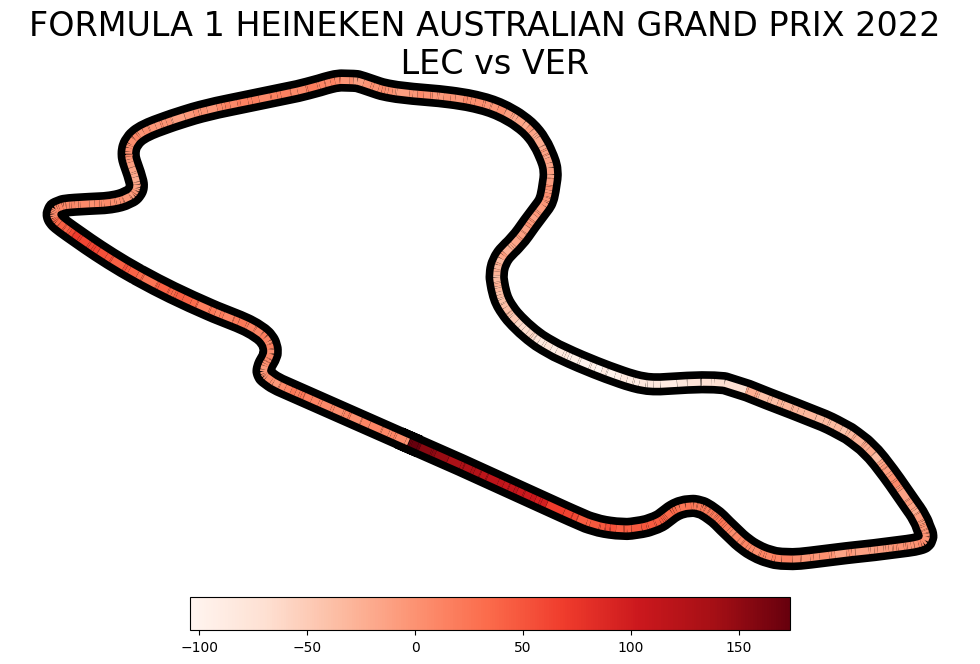

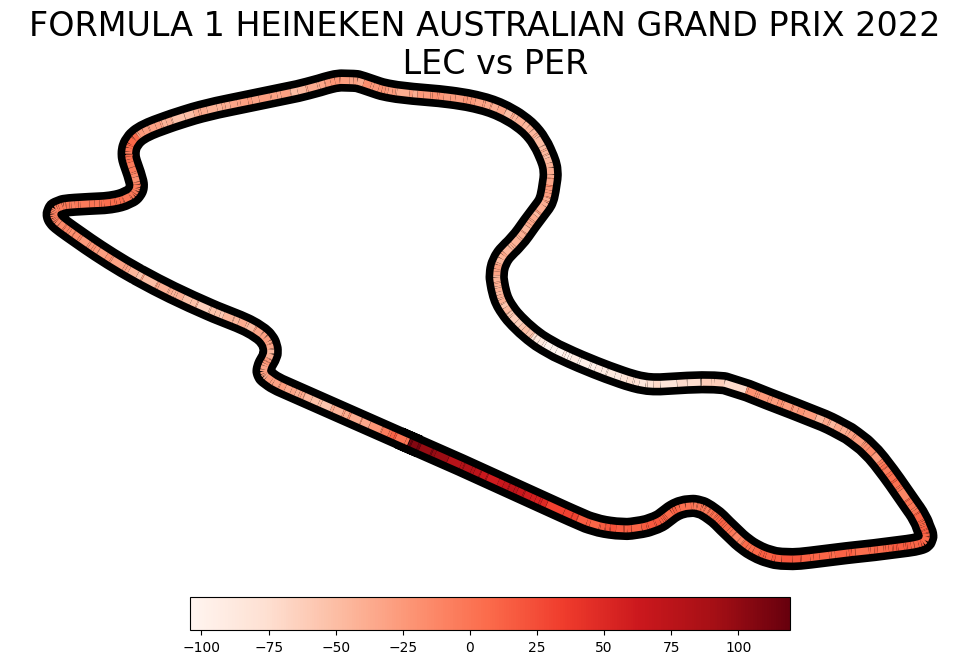

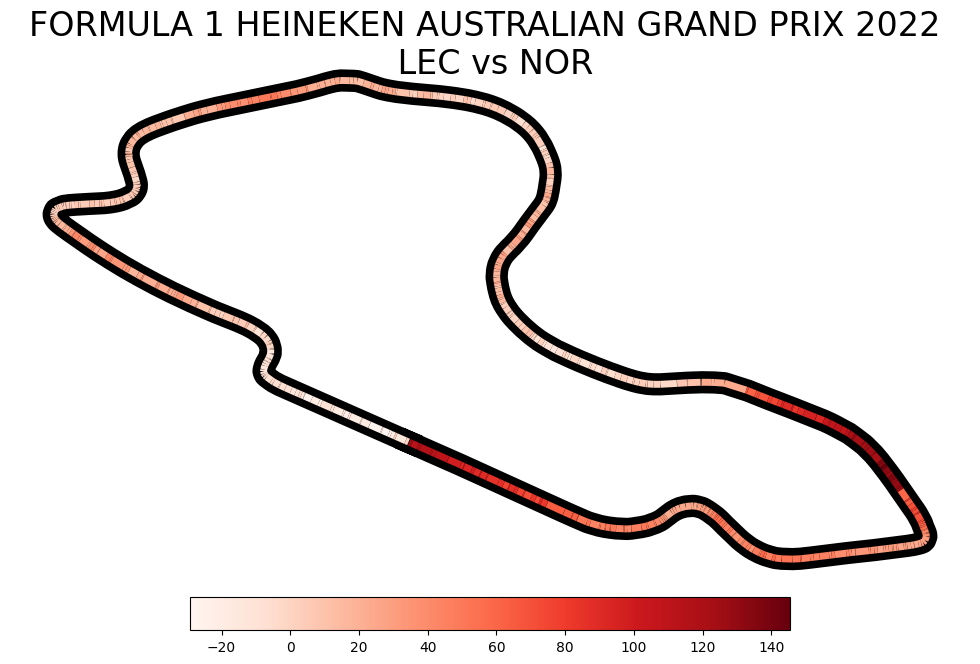

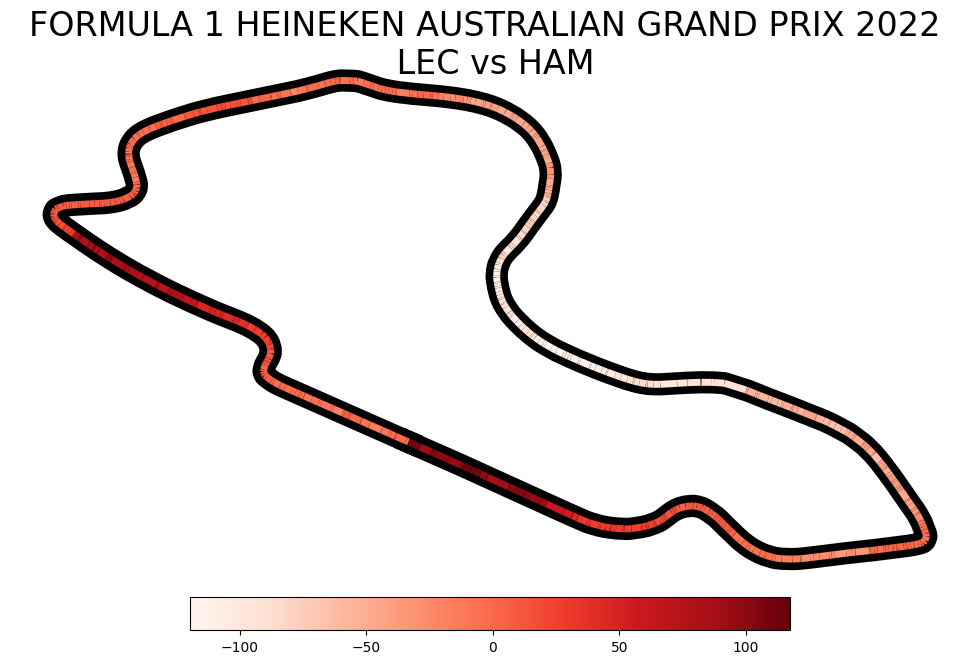

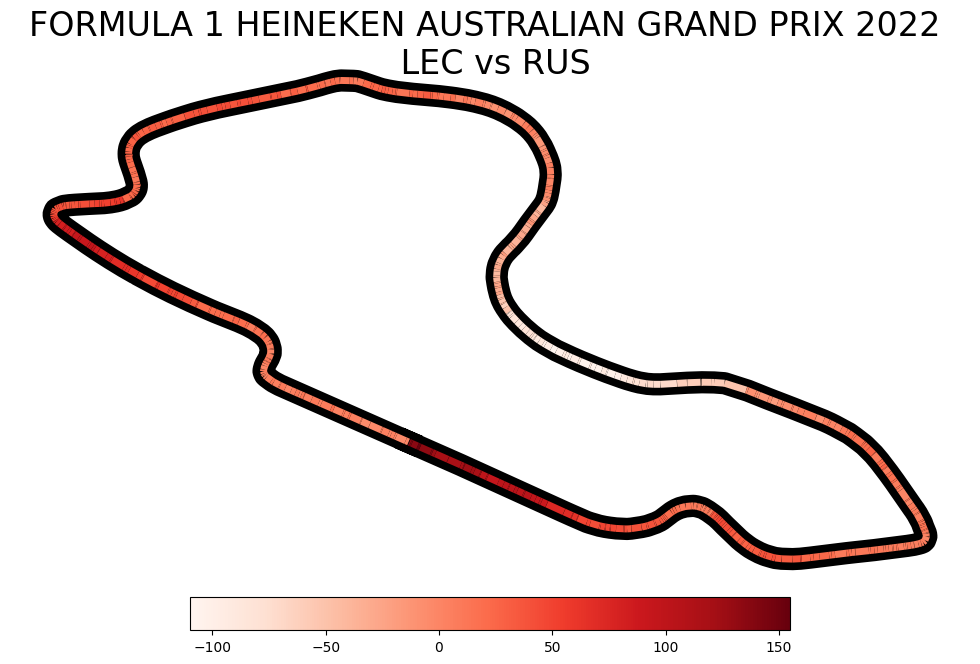

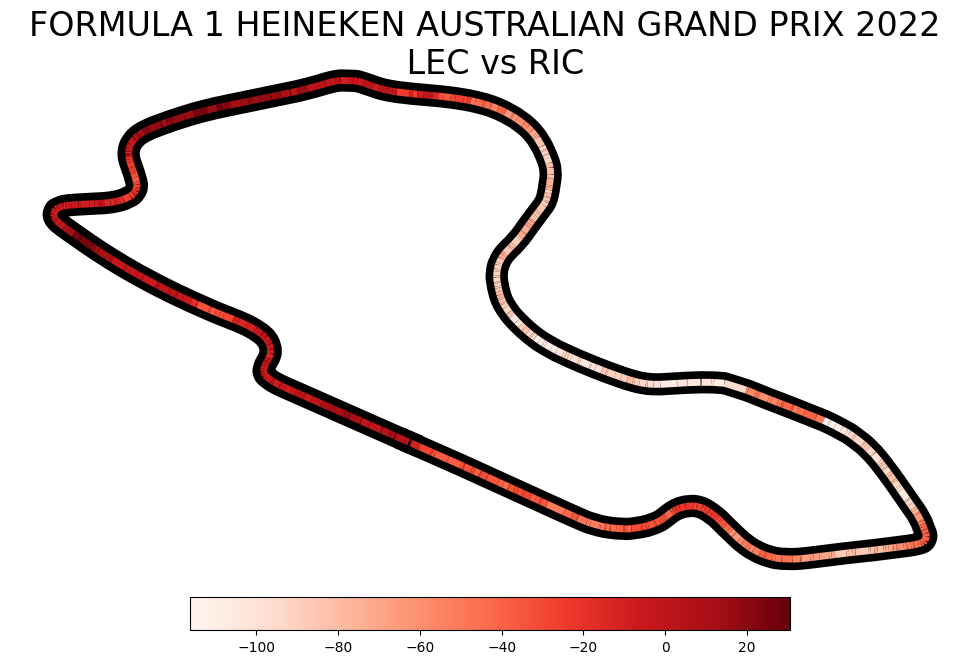

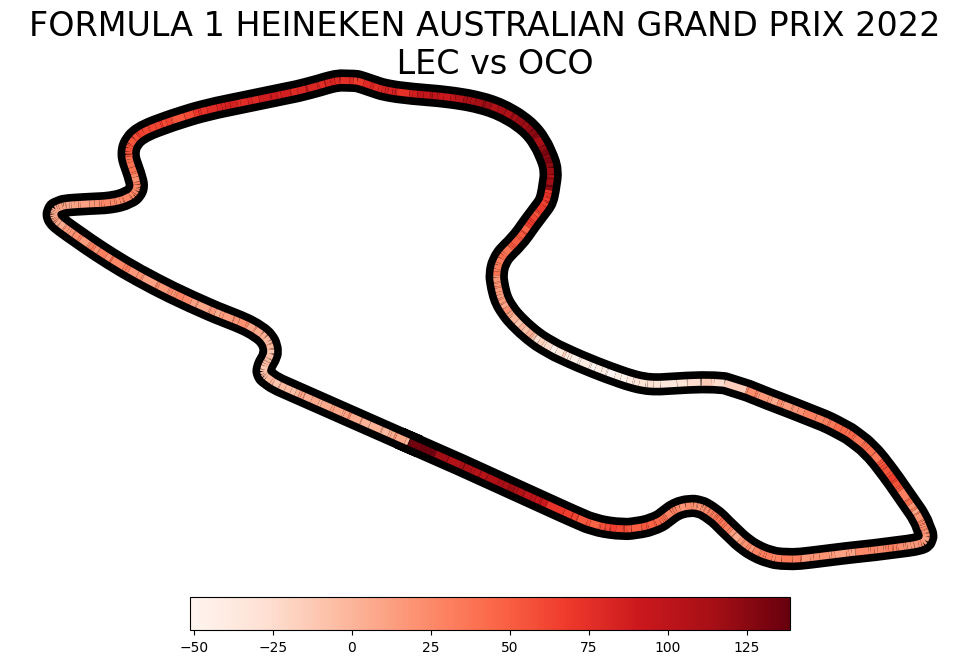

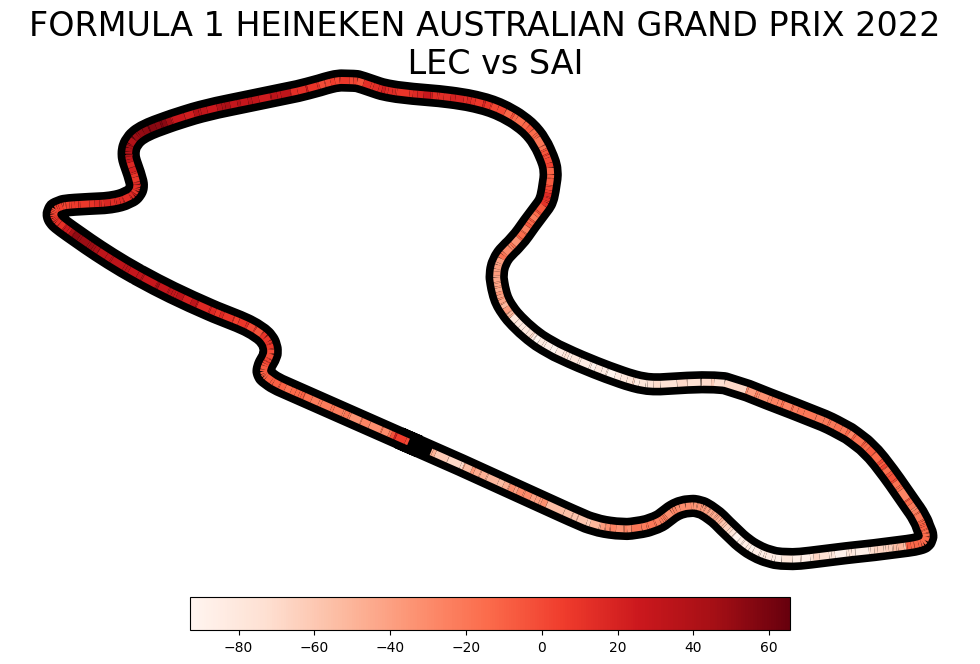

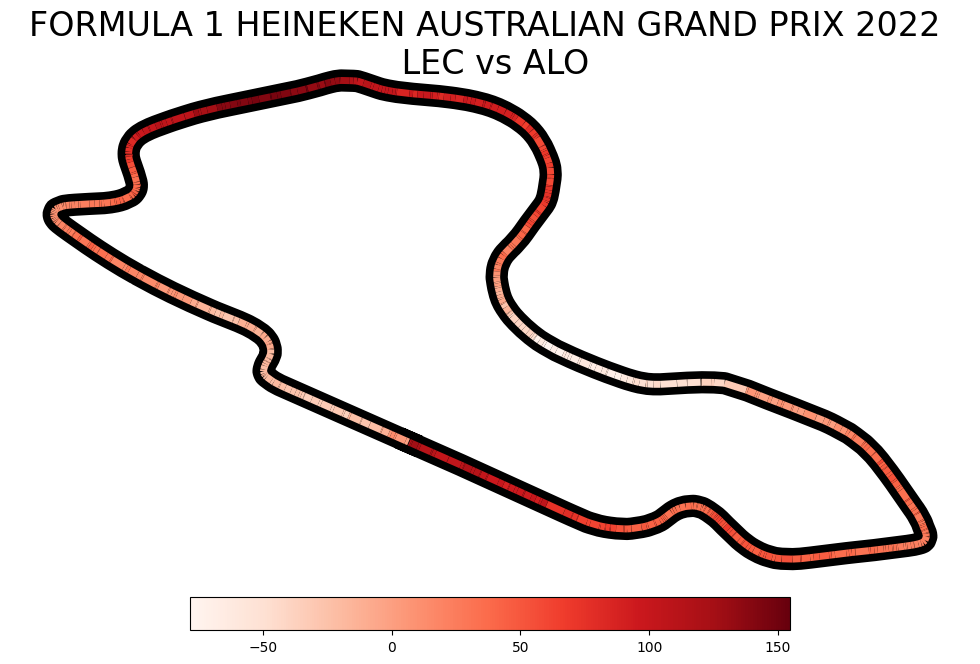

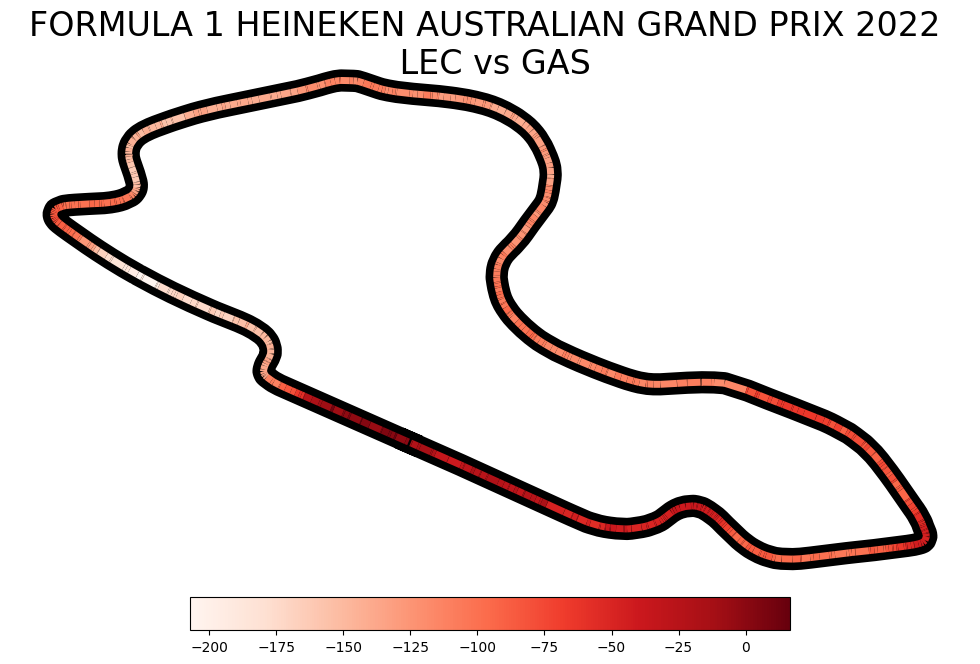

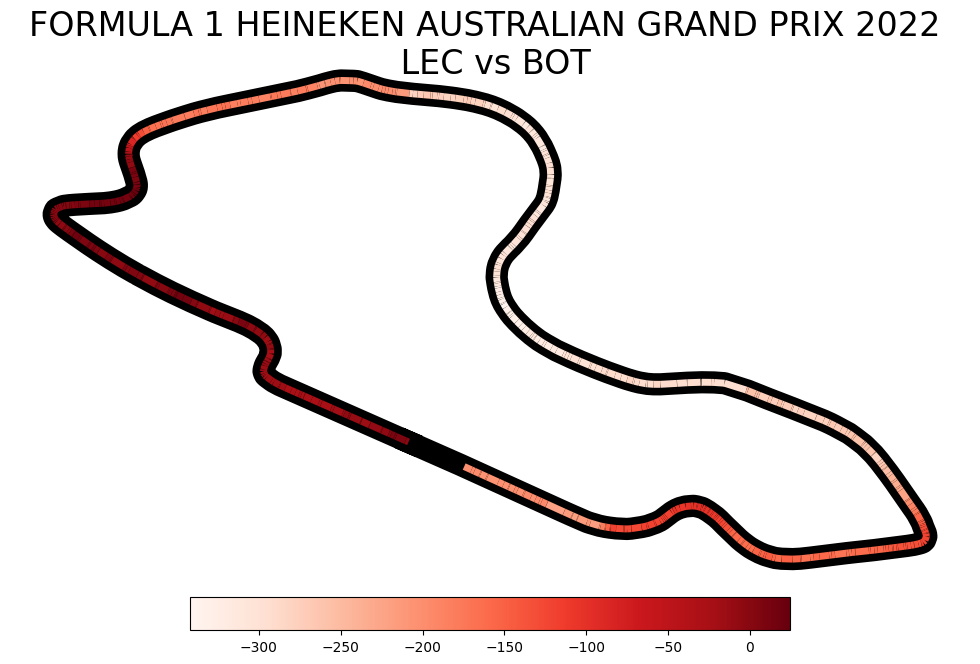

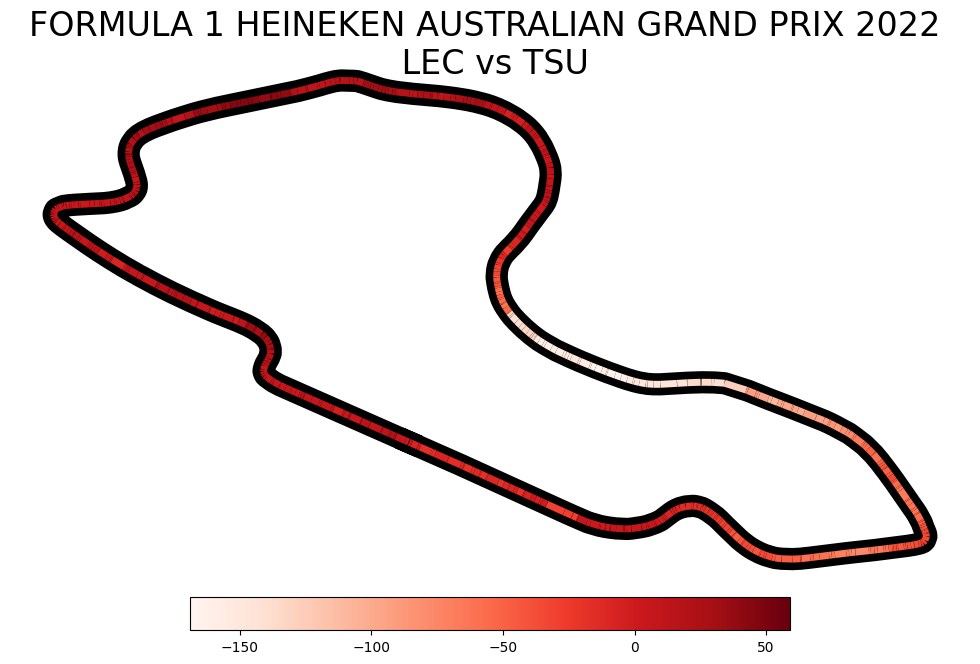

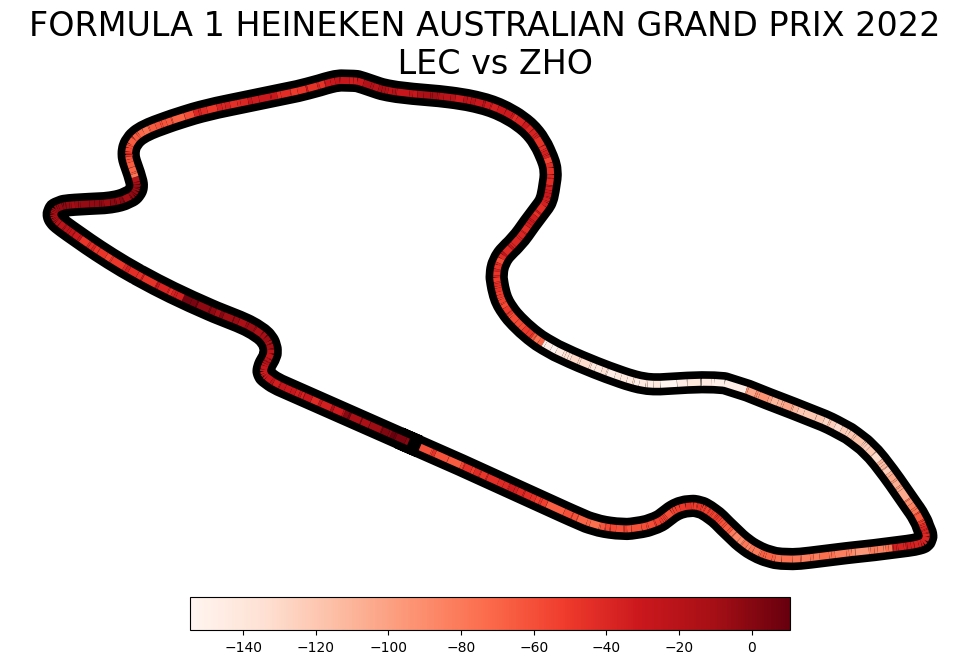

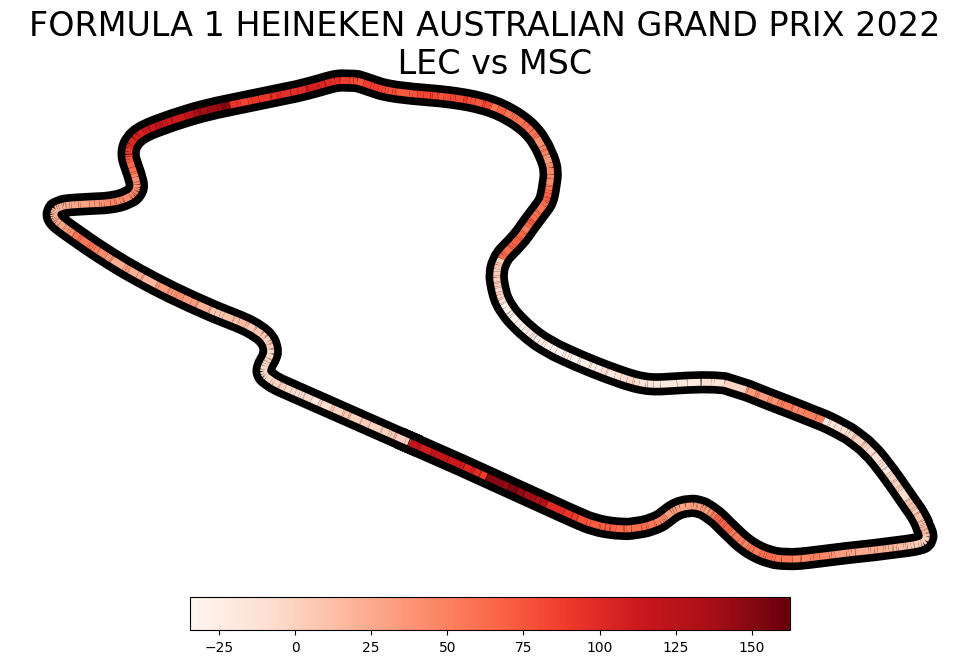

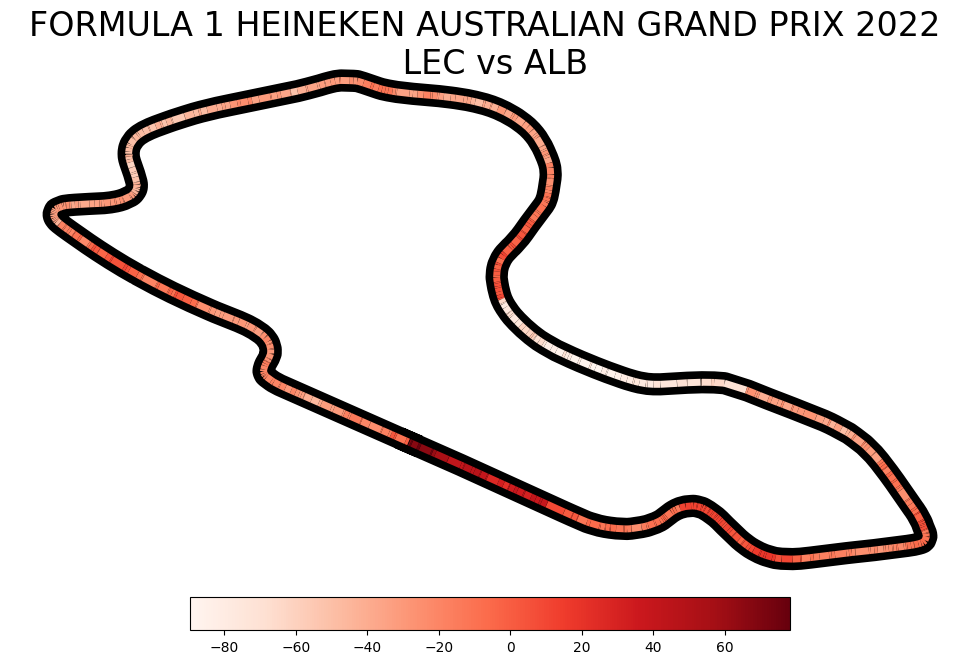

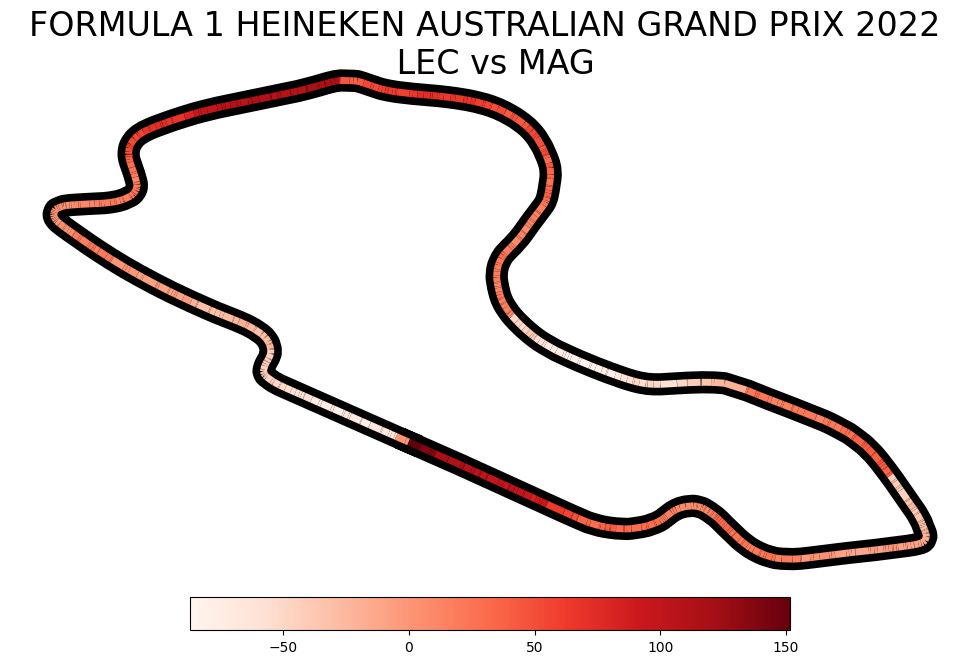

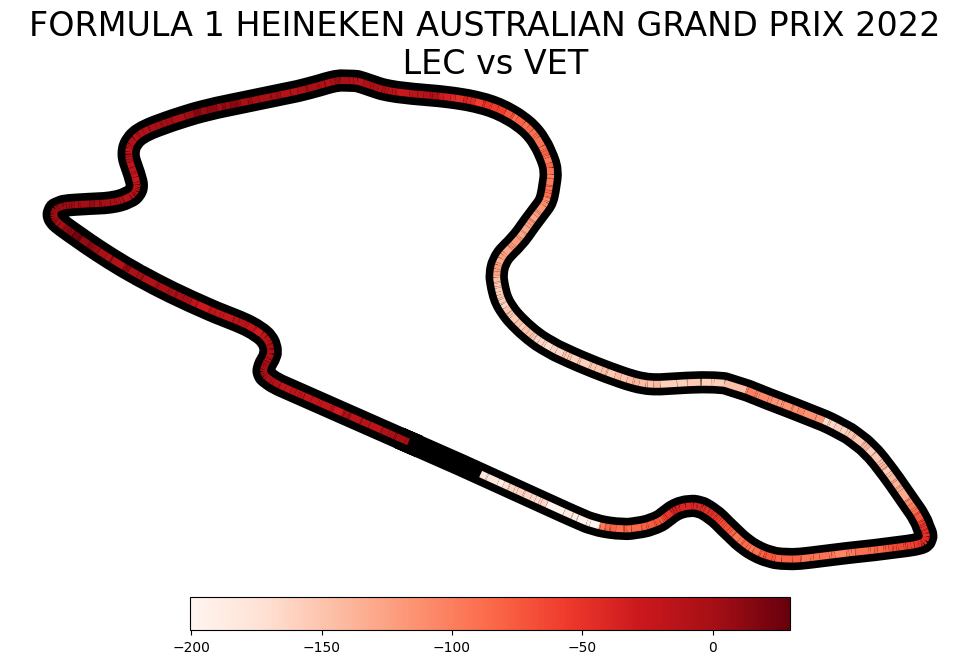

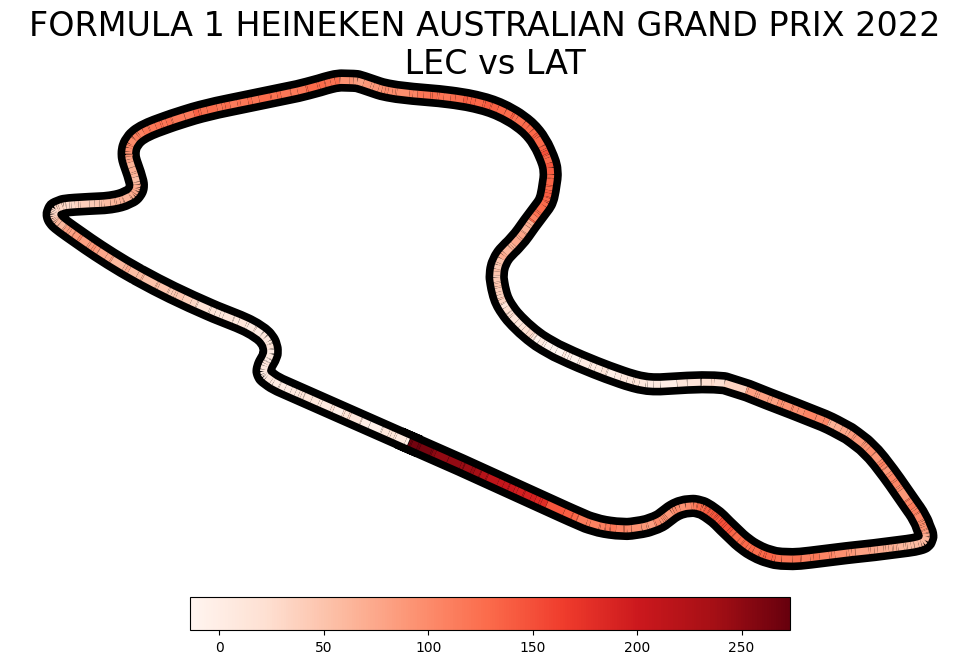

KeyError: nan

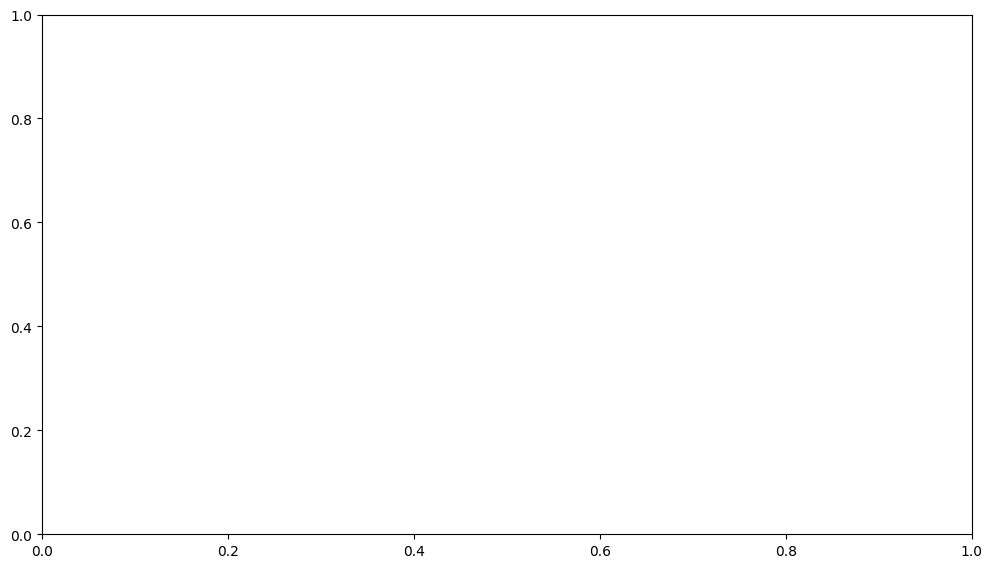

In [10]:
colormap = mpl.colormaps['Reds']

for i,driver in enumerate(las):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

    lap = session.laps.pick_driver(las[i])

    driver = session.get_driver(las[i])['Abbreviation']
    
    color = np.subtract(color_fast,lap.pick_fastest().telemetry[check])

    fig.suptitle(f'{session.event.OfficialEventName} \n {driver_fast} vs {driver}', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_fast.telemetry['X'], lap_fast.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

    plt.savefig(f'{path}/{driver_fast} vs {driver}.png')
    # Show the plot
    plt.show()